Entrenamos el perceptrón con los siguientes datos:

Entrada: [0 0] → Salida esperada: [0]
Entrada: [0 1] → Salida esperada: [1]
Entrada: [1 0] → Salida esperada: [1]
Entrada: [1 1] → Salida esperada: [0]
Predicciones para las entradas: [[0]
 [1]
 [1]
 [0]]
Visualizamos la frontera de decisión


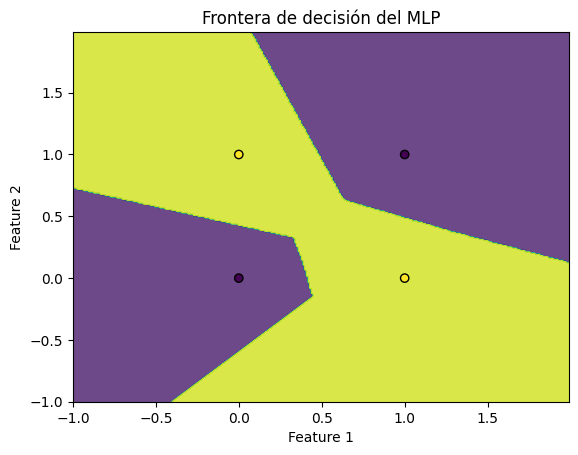

In [2]:
import numpy as np

# Definición de la clase MLP
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate

        # Inicializar pesos y sesgos
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros((1, self.output_size))

    def relu(self, z):
        return np.maximum(0, z)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        # Propagación hacia adelante
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        # Retropropagación
        m = X.shape[0]

        # Gradiente de la pérdida con respecto a z2
        dloss_dz2 = output - y
        dloss_dw2 = np.dot(self.a1.T, dloss_dz2) / m
        dloss_db2 = np.sum(dloss_dz2, axis=0, keepdims=True) / m

        # Gradiente de la pérdida con respecto a a1
        dloss_da1 = np.dot(dloss_dz2, self.weights2.T)
        dloss_dz1 = dloss_da1 * (self.a1 > 0)
        dloss_dw1 = np.dot(X.T, dloss_dz1) / m
        dloss_db1 = np.sum(dloss_dz1, axis=0, keepdims=True) / m

        # Actualizar pesos y sesgos
        self.weights2 -= self.lr * dloss_dw2
        self.bias2 -= self.lr * dloss_db2
        self.weights1 -= self.lr * dloss_dw1
        self.bias1 -= self.lr * dloss_db1

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)


 # Datos de ejemplo (problema XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

print("Entrenamos el perceptrón con los siguientes datos:\n")

for entrada, salida in zip(X, y):
    print(f"Entrada: {entrada} → Salida esperada: {salida}")

# Crear y entrenar el MLP
mlp = MLP(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1)
mlp.train(X, y, epochs=10000)

# Predecir con el MLP entrenado
predictions = mlp.predict(X)
print("Predicciones para las entradas:", predictions)


import matplotlib.pyplot as plt
print("Visualizamos la frontera de decisión")
# Función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model):
    # Definir los límites del gráfico
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Crear una malla de puntos para evaluar el modelo
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predecir la clase para cada punto en la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Frontera de decisión del MLP')
    plt.show()

# Visualizar la frontera de decisión
plot_decision_boundary(X, y, mlp)